<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/MobilePhone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Mobileprice_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Mobileprice_test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

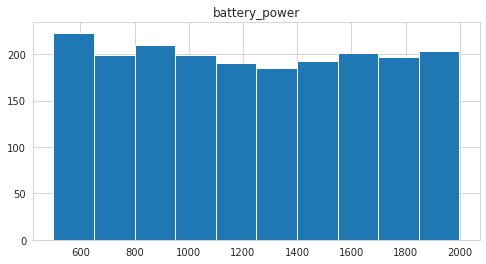

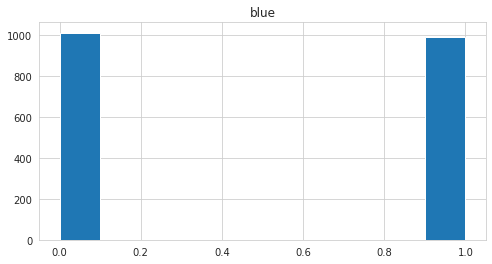

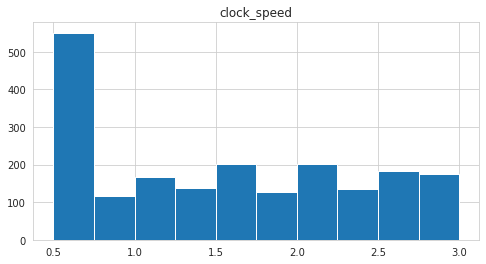

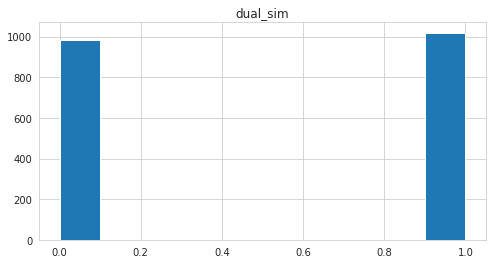

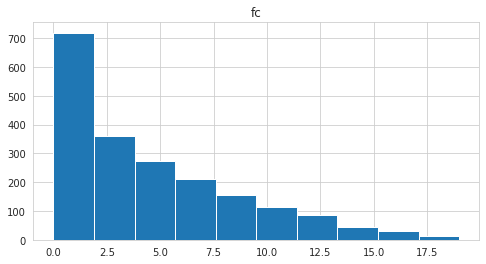

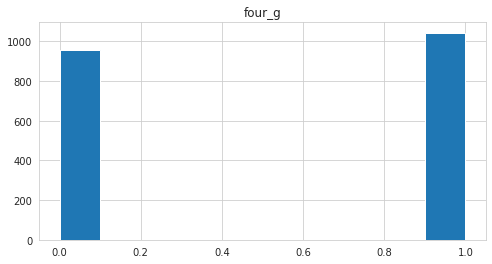

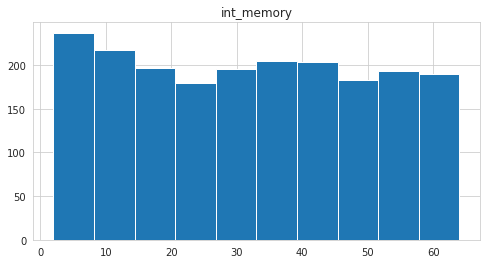

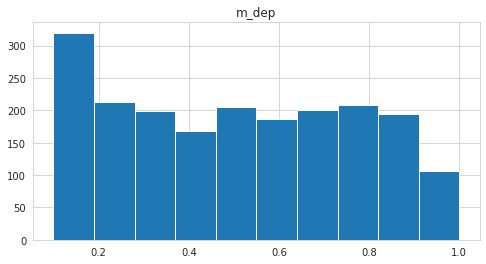

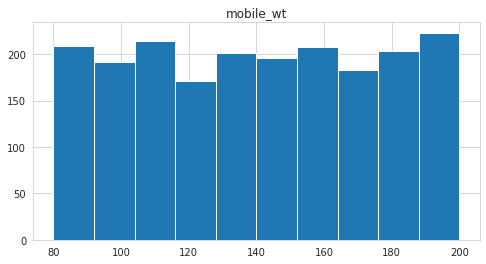

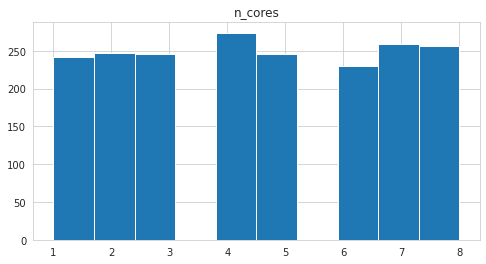

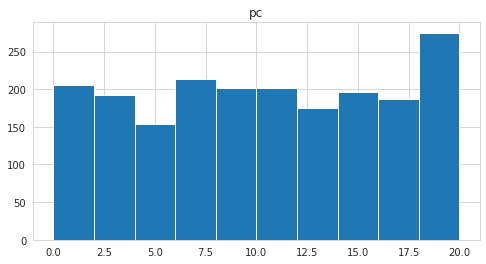

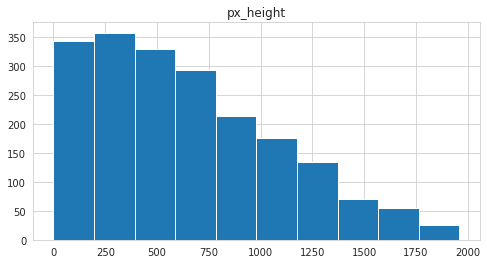

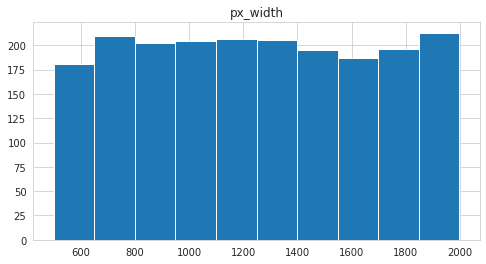

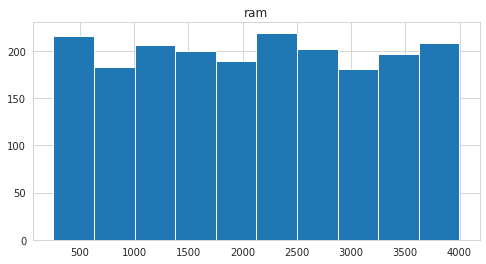

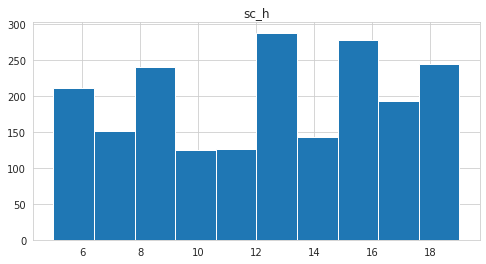

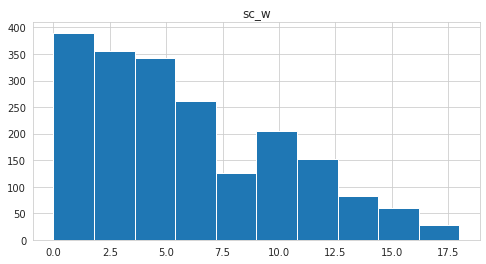

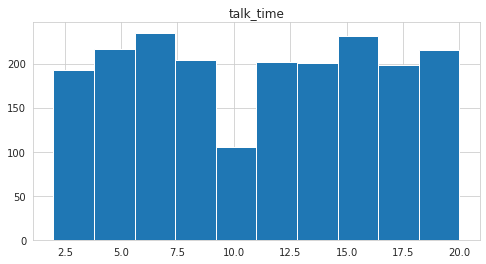

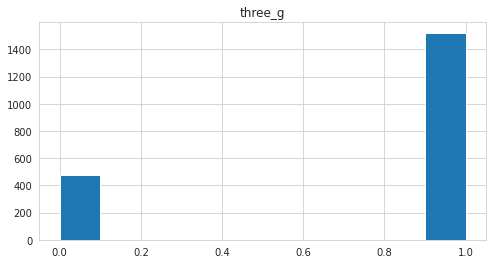

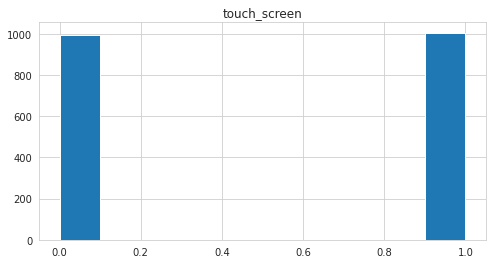

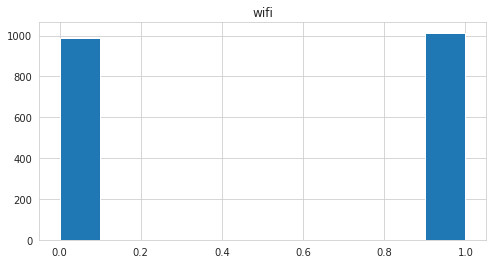

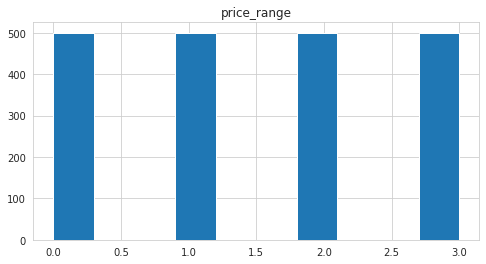

In [15]:
for i in train.columns:
  plt.subplots(figsize=(8,4))
  train[i].hist()
  plt.title(f'{i}')

In [16]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
IQR

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
price_range         1.50
dtype: float64

In [34]:
s_outlier = train < Q1-1.5*IQR
b_outlier = train > Q1+1.5*IQR

In [54]:
outlier_index = train[train[((train < Q1 - 1.5*IQR)|(train > Q3 + 1.5*IQR))].any(axis=1)].index
train = train.drop(index=outlier_index)

In [107]:
from sklearn.preprocessing import robust_scale
from sklearn.model_selection import train_test_split, cross_val_score

In [57]:
x = train.drop(['price_range'], axis=1)
y = train['price_range']

In [58]:
x = robust_scale(x)

array([[-0.49967299,  0.        ,  0.46666667, ..., -1.        ,
        -1.        ,  0.        ],
       [-0.26553303,  1.        , -0.66666667, ...,  0.        ,
         0.        , -1.        ],
       [-0.8646174 ,  1.        , -0.66666667, ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 0.89862655,  0.        , -0.4       , ...,  0.        ,
         0.        , -1.        ],
       [ 0.37671681,  0.        , -0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.93394375,  1.        ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
x = pd.DataFrame(x, columns=train.drop(['price_range'], axis=1).columns)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [99]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, roc_auc_score, plot_confusion_matrix

In [73]:
def modeling(model):
  model = model
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print('accuracy:', accuracy_score(y_test, y_pred))
  print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(model, x_test, y_test, normalize='all')

accuracy: 0.8545454545454545
cohen_kappa_score: 0.8057395143487859
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       142
           1       0.77      0.80      0.79       121
           2       0.75      0.84      0.79       110
           3       0.97      0.87      0.92       122

    accuracy                           0.85       495
   macro avg       0.86      0.85      0.85       495
weighted avg       0.86      0.85      0.86       495



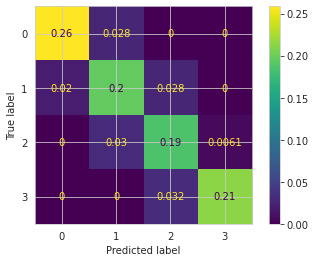

In [74]:
modeling(SVC(kernel='rbf'))

accuracy: 0.9414141414141414
cohen_kappa_score: 0.9216682400318674
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       142
           1       0.90      0.92      0.91       121
           2       0.92      0.92      0.92       110
           3       0.98      0.97      0.98       122

    accuracy                           0.94       495
   macro avg       0.94      0.94      0.94       495
weighted avg       0.94      0.94      0.94       495



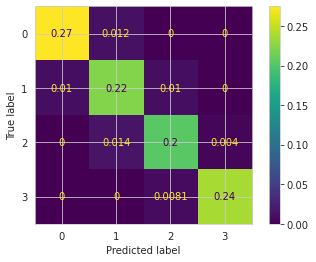

In [105]:
modeling(SVC(kernel='linear', C=0.8))

accuracy: 0.797979797979798
cohen_kappa_score: 0.7301467020656043
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       142
           1       0.71      0.74      0.72       121
           2       0.72      0.76      0.74       110
           3       0.89      0.85      0.87       122

    accuracy                           0.80       495
   macro avg       0.80      0.80      0.80       495
weighted avg       0.80      0.80      0.80       495



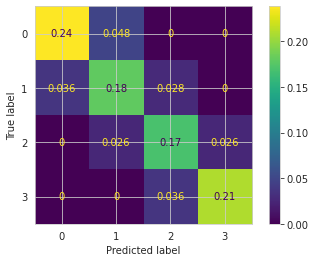

In [77]:
modeling(DecisionTreeClassifier())

accuracy: 0.8484848484848485
cohen_kappa_score: 0.7975095722747652
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.77      0.76      0.77       121
           2       0.75      0.81      0.78       110
           3       0.95      0.89      0.92       122

    accuracy                           0.85       495
   macro avg       0.85      0.84      0.84       495
weighted avg       0.85      0.85      0.85       495



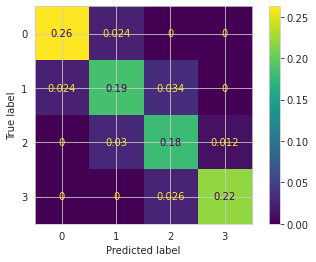

In [83]:
modeling(RandomForestClassifier(n_estimators=500))

accuracy: 0.8949494949494949
cohen_kappa_score: 0.859572935874914
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       142
           1       0.85      0.83      0.84       121
           2       0.83      0.88      0.85       110
           3       0.97      0.92      0.94       122

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.89       495
weighted avg       0.90      0.89      0.90       495



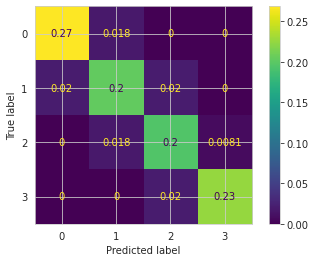

In [93]:
modeling(xgb.XGBClassifier(n_estimators=300))

accuracy: 0.8787878787878788
cohen_kappa_score: 0.8379528590135312
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.83      0.80      0.82       121
           2       0.79      0.85      0.82       110
           3       0.96      0.90      0.93       122

    accuracy                           0.88       495
   macro avg       0.88      0.88      0.88       495
weighted avg       0.88      0.88      0.88       495



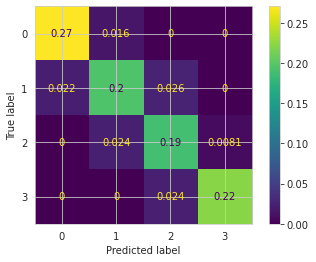

In [98]:
modeling(lgbm.LGBMClassifier(n_estimators=200))

accuracy: 0.5131313131313131
cohen_kappa_score: 0.3513509104848489
              precision    recall  f1-score   support

           0       0.67      0.61      0.63       142
           1       0.38      0.37      0.38       121
           2       0.39      0.51      0.44       110
           3       0.65      0.55      0.60       122

    accuracy                           0.51       495
   macro avg       0.52      0.51      0.51       495
weighted avg       0.53      0.51      0.52       495



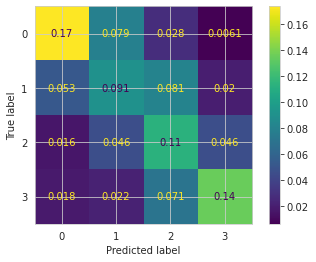

In [100]:
modeling(ExtraTreeClassifier())

accuracy: 0.8949494949494949
cohen_kappa_score: 0.859572935874914
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       142
           1       0.85      0.83      0.84       121
           2       0.83      0.88      0.85       110
           3       0.97      0.92      0.94       122

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.89       495
weighted avg       0.90      0.89      0.90       495



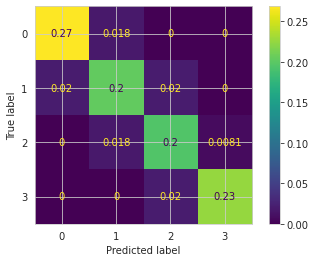

In [111]:
model = xgb.XGBClassifier(n_estimators=300)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, normalize='all')

In [119]:
for i in range(1, 15, 1):
  model_xgb = xgb.XGBClassifier(n_estimators=300, max_depth=i)
  model_xgb.fit(x_train, y_train)
  y_pred_xgb = model_xgb.predict(x_test)
  print(f'{i}번째 accuracy:', accuracy_score(y_test, y_pred_xgb))

1번째 accuracy: 0.8444444444444444
2번째 accuracy: 0.8888888888888888
3번째 accuracy: 0.8949494949494949
4번째 accuracy: 0.8747474747474747
5번째 accuracy: 0.8646464646464647
6번째 accuracy: 0.8646464646464647
7번째 accuracy: 0.8646464646464647
8번째 accuracy: 0.8626262626262626
9번째 accuracy: 0.8626262626262626
10번째 accuracy: 0.8666666666666667
11번째 accuracy: 0.8585858585858586
12번째 accuracy: 0.8626262626262626
13번째 accuracy: 0.8606060606060606
14번째 accuracy: 0.8626262626262626


In [127]:
for i in range(1, 16, 1):
  model_rf = RandomForestClassifier(n_estimators=200, max_depth=i)
  model_rf.fit(x_train, y_train)
  y_pred_rf = model_rf.predict(x_test)
  print(f'{i}번째 accuracy:', accuracy_score(y_test, y_pred_rf))

1번째 accuracy: 0.705050505050505
2번째 accuracy: 0.8101010101010101
3번째 accuracy: 0.804040404040404
4번째 accuracy: 0.8121212121212121
5번째 accuracy: 0.8141414141414142
6번째 accuracy: 0.8303030303030303
7번째 accuracy: 0.8464646464646465
8번째 accuracy: 0.8383838383838383
9번째 accuracy: 0.8383838383838383
10번째 accuracy: 0.8444444444444444
11번째 accuracy: 0.8464646464646465
12번째 accuracy: 0.8606060606060606
13번째 accuracy: 0.8444444444444444
14번째 accuracy: 0.8464646464646465
15번째 accuracy: 0.8545454545454545


Text(0.5, 1.0, 'Feature importances by RandomForest')

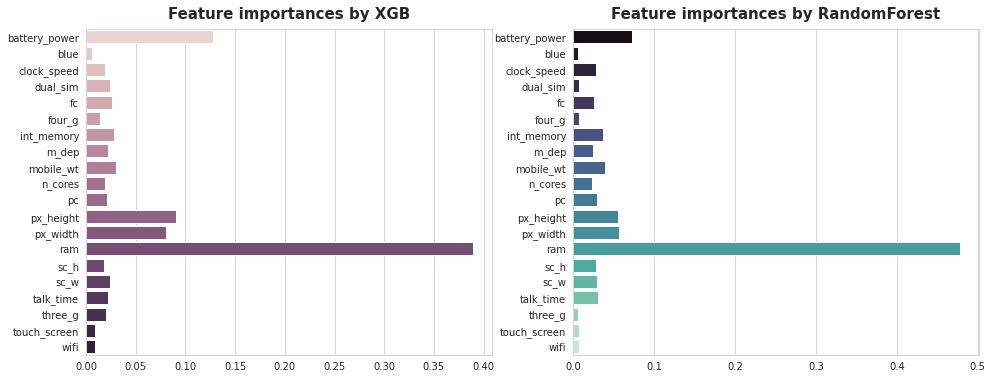

In [142]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)

sns.barplot(y=x_train.columns, x=model_xgb.feature_importances_, ax=ax[0], palette=sns.cubehelix_palette(n_colors=len(x_train.columns)))
ax[0].set_title('Feature importances by XGB', fontweight='bold', fontsize=15, pad=10, )

sns.barplot(y=x_train.columns, x=model_rf.feature_importances_, ax=ax[1], palette=sns.color_palette('mako',n_colors=len(x_train.columns)))
ax[1].set_title('Feature importances by RandomForest', fontweight='bold', fontsize=15, pad=10)